In [1]:
import quandl, pickle
quandl.ApiConfig.api_key = quandl.ApiConfig.api_key = 'm3v5hbXpy1RPTXaFyHJU'
import math,datetime
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=quandl.get('WIKI/GOOGL')

In [4]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [5]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
df= df[['Adj. Open', 'Adj. High','Adj. Low', 'Adj. Close', 'Adj. Volume']]

df.head()


,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [7]:
df['HL_PCT'] =  (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100

In [8]:
df['PCT_change'] =  (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

In [9]:
df =  df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume' ]] 
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [10]:
forecast_col = 'Adj. Close'

In [11]:
df.fillna(-99999, inplace=True)

In [12]:

forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)


print(forecast_out)

35


In [13]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN
2018-03-26,1054.09,4.818025,0.332191,3272409.0,NaN
2018-03-27,1006.94,6.707965,-5.353887,2940957.0,NaN


In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,svm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Z = df.drop('label', axis = 1)



scaler.fit(Z)

scaled_features = scaler.transform(Z)

In [15]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
3419,2.657535,-0.123972,0.103590,-0.706687
3420,2.499040,0.763572,-1.635754,-0.533577
3421,2.395833,1.330422,-1.551850,-0.655395
3422,2.502687,1.832086,0.237340,-0.551250
3423,2.319748,3.133142,-3.540518,-0.591440


In [16]:
 

X = df_feat[:-forecast_out]

X_lately = df_feat[-forecast_out:]
df.dropna(inplace=True)

y = df['label']



df.tail()


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,1.142604,-0.029718,1792602.0,1094.00
2018-01-31,1182.22,1.213207,-0.134312,1643877.0,1053.15
2018-02-01,1181.59,1.547000,0.476195,2774967.0,1026.55
2018-02-02,1119.20,1.811604,-0.729098,5798880.0,1054.09
2018-02-05,1068.76,5.512236,-2.893850,3742469.0,1006.94


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression (n_jobs=10)

#clf.fit(X_train,y_train)
#with open('linearregression.pickle','wb') as f:
   # pickle.dump(clf,f)
    
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [19]:
accuracy=clf.score(X_test,y_test)

In [20]:
forecast_set=clf.predict(X_lately)

In [21]:
print(forecast_set, accuracy, forecast_out )

[1097.3137843  1071.999656   1018.82665097 1056.17084797 1072.000823
 1072.54546543 1089.78115108 1108.6769746  1113.90435067 1121.14042979
 1131.1058871  1128.38794345 1146.57960476 1162.77715348 1135.27895359
 1121.64773096 1086.92513769 1099.92230936 1111.95901778 1120.21454425
 1132.60860243 1148.38557588 1178.63406383 1184.69576238 1156.39272981
 1167.66645168 1168.65229325 1152.29572415 1116.93441905 1113.34139528
 1111.91615534 1069.13512184 1041.78935871 1068.17591644 1019.31705457] 0.9786074032447892 35


In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('ggplot')
import datetime

In [24]:
df['Forecast']=np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400

next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
    
print (df.tail())
    

    


                     Adj. Close  HL_PCT  PCT_change  Adj. Volume  label  \
Date                                                                      
2018-03-08 02:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-09 02:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-10 02:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-11 02:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-12 02:00:00         NaN     NaN         NaN          NaN    NaN   

                        Forecast  
Date                              
2018-03-08 02:00:00  1111.916155  
2018-03-09 02:00:00  1069.135122  
2018-03-10 02:00:00  1041.789359  
2018-03-11 02:00:00  1068.175916  
2018-03-12 02:00:00  1019.317055  


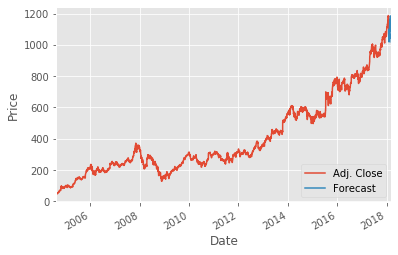

In [26]:
df ['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

